In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import glob

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'test', 'train.csv', 'sample_submission.csv']


In [26]:
train= pd.read_csv("../input/train.csv")
sample= pd.read_csv("../input/sample_submission.csv")
print(train.shape)
train_images = '../input/train/*'
test_images = '../input/test/*'
train.head()

(17500, 2)


,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [27]:
train.has_cactus.unique()

array([1, 0])

1    13136
0     4364
Name: has_cactus, dtype: int64

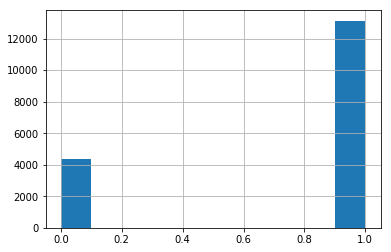

In [28]:
train.has_cactus.hist()
train.has_cactus.value_counts()

([], <a list of 0 Text yticklabel objects>)

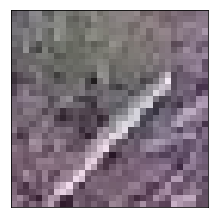

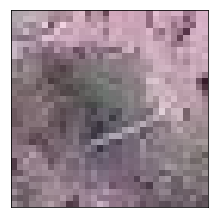

In [29]:
#let's visualize some cactus images
IMAGES = os.path.join(train_images, "*")
all_images = glob.glob(IMAGES)

plt.figure(figsize = (12,10))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread(all_images[1]))
plt.xticks([])
plt.yticks([])
plt.figure(figsize = (12,10))
plt.subplot(1, 3, 1)
plt.imshow(plt.imread(all_images[234]))
plt.xticks([])
plt.yticks([])

In [30]:
# Get ids and labels
train_id = train['id']
labels = train['has_cactus']
test_id = sample['id']

In [31]:
import tqdm
img = plt.imread('../input/train/train/'+ train['id'][0])
img.shape

(32, 32, 3)

In [32]:
# Generar imagenes ENTRENAMIENTO (90% datos entrenamiento) desde un .jpg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score


x_train, x_dev, y_train, y_dev = train_test_split(train['id'], train['has_cactus'], test_size = 0.1, random_state = 32)
x_train_arr = []
for images in tqdm.tqdm(x_train):
    img = plt.imread('../input/train/train/' + images)
    x_train_arr.append(img)

x_train_arr = np.array(x_train_arr)
print(x_train_arr.shape)


100%|██████████| 15750/15750 [00:14<00:00, 1079.01it/s]

(15750, 32, 32, 3)


In [33]:
print(x_train.shape)
print(x_dev.shape)
print(y_train.shape)
print(y_dev.shape)

(15750,)
(1750,)
(15750,)
(1750,)


In [34]:
# Generar imagenes DEV SET (10% datos entrenamiento) desde un .jpg
x_dev_arr = []
for images in tqdm.tqdm(x_dev):
    img = plt.imread('../input/train/train/' + images)
    x_dev_arr.append(img)

x_dev_arr = np.array(x_dev_arr)
print(x_dev_arr.shape)

100%|██████████| 1750/1750 [00:01<00:00, 1150.39it/s]

(1750, 32, 32, 3)


In [35]:
# Generar imagenes PREDIC (PREDICTION) desde un .jpg
X_test = []
for images in tqdm.tqdm(sample['id']):
    img = plt.imread('../input/test/test/' + images)
    X_test.append(img)

X_test = np.array(X_test)
print("X_test.shape:", X_test.shape)

100%|██████████| 4000/4000 [00:03<00:00, 1089.89it/s]

X_test.shape: (4000, 32, 32, 3)


In [36]:
# Now we rescale datas and they are ready for the CNN
X_train = x_train_arr.astype('float32')
X_dev = x_dev_arr.astype('float32')
X_train = X_train/255
X_dev = X_dev/255
X_test= X_test/255
y_train = np.asarray(y_train)
y_dev = np.asarray(y_dev)

# Convert y_train and y_dev "list" ----> "matrix"
y_train=np.reshape(y_train, (-1,1))
y_dev=np.reshape(y_dev, (-1,1))


print("X_train.shape:", X_train.shape)
print("X_dev.shape:", X_dev.shape )
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_dev.shape )

#let's visualize some values in cactus images
print(X_train[240 ,: ,:,1])
print(y_train[240,:])
print()
print(X_dev[240 ,: ,:,1])
print(y_dev[240,:])

X_train.shape: (15750, 32, 32, 3)
X_dev.shape: (1750, 32, 32, 3)
y_train.shape: (15750, 1)
y_test.shape: (1750, 1)
[[0.5058824  0.47058824 0.43529412 ... 0.44705883 0.32156864 0.3529412 ]
 [0.47843137 0.49803922 0.50980395 ... 0.43529412 0.45882353 0.6       ]
 [0.46666667 0.40392157 0.33333334 ... 0.46666667 0.5764706  0.7372549 ]
 ...
 [0.5372549  0.5058824  0.45490196 ... 0.3372549  0.28627452 0.2784314 ]
 [0.4        0.34901962 0.2901961  ... 0.42352942 0.3764706  0.37254903]
 [0.3254902  0.32156864 0.35686275 ... 0.40392157 0.43137255 0.49019608]]
[0]

[[0.4392157  0.4392157  0.4627451  ... 0.47058824 0.4117647  0.38431373]
 [0.49803922 0.4117647  0.41960785 ... 0.47843137 0.42352942 0.3882353 ]
 [0.7607843  0.6156863  0.59607846 ... 0.48235294 0.42745098 0.38431373]
 ...
 [0.48235294 0.4392157  0.38039216 ... 0.5372549  0.5176471  0.49019608]
 [0.47058824 0.45490196 0.4        ... 0.47843137 0.45490196 0.4745098 ]
 [0.44313726 0.44313726 0.37254903 ... 0.42745098 0.41568628 0.494

In [37]:
import tensorflow as tf
from tensorflow.python.framework import ops
import scipy
from scipy import ndimage
import math

In [38]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """
    X = tf.placeholder(tf.float32, shape=(None, n_H0, n_W0, n_C0)) 
    Y = tf.placeholder(tf.float32, shape=(None, n_y))
    
    return X, Y

In [39]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W : [fc, fc, Nc_1, Nc]
    Returns:
    parameters -- a dictionary of tensors containing W1 W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours

    W1 = tf.get_variable("W1", [4, 4, 3, 16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2, 2, 16, 64], initializer = tf.contrib.layers.xavier_initializer(seed = 0))

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [40]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X,W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 1 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 1,activation_fn=None)
   
    return Z3

In [41]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Returns:
    cost - Tensor of the cost function
    """
    cost = tf.reduce_mean(tf.losses.mean_squared_error(Y, Z3))
    
    return cost

In [42]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [43]:
def model(X_train, Y_train, X_test, Y_test, X_test_test, learning_rate = 0.009,
          num_epochs = 20, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    # Inilitialize parameters 
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                _ , temp_cost = sess.run([optimizer,cost], feed_dict ={X:minibatch_X, Y:minibatch_Y})
                  
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.round(Z3)
        correct_prediction = tf.equal(predict_op, Y)
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
            # Calculate Prediction in test_test set
            
        prediction=predict_op.eval({X: X_test_test})
        submission = pd.DataFrame({'Id':sample["id"],'has_cactus':prediction.reshape(-1).tolist()})
        submission.to_csv("submission_set1.csv", index=False)
        print("Prediction_test_test set:", prediction.shape[0])
        print(submission.head())
        
        return train_accuracy, test_accuracy, parameters

Cost after epoch 0: 0.122229
Cost after epoch 5: 0.046579
Cost after epoch 10: 0.030577
Cost after epoch 15: 0.026407
Cost after epoch 20: 0.023342
Cost after epoch 25: 0.020896
Cost after epoch 30: 0.020413
Cost after epoch 35: 0.019192
Cost after epoch 40: 0.018753
Cost after epoch 45: 0.017173
Cost after epoch 50: 0.016751
Cost after epoch 55: 0.016662
Cost after epoch 60: 0.015435
Cost after epoch 65: 0.015228
Cost after epoch 70: 0.014847
Cost after epoch 75: 0.014465
Cost after epoch 80: 0.013949
Cost after epoch 85: 0.013273
Cost after epoch 90: 0.012910
Cost after epoch 95: 0.013496


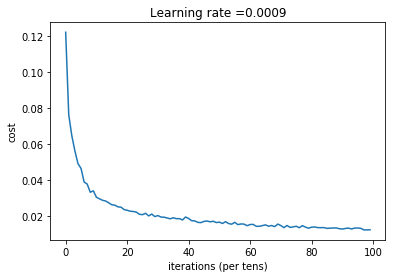

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9908571
Test Accuracy: 0.9868571
Prediction_test_test set: 4000
                                     Id  has_cactus
0  000940378805c44108d287872b2f04ce.jpg         1.0
1  0017242f54ececa4512b4d7937d1e21e.jpg         1.0
2  001ee6d8564003107853118ab87df407.jpg         0.0
3  002e175c3c1e060769475f52182583d0.jpg         0.0
4  0036e44a7e8f7218e9bc7bf8137e4943.jpg         1.0


In [44]:
_, _, parameters = model(X_train, y_train, X_dev, y_dev, X_test,learning_rate = 0.0009,
          num_epochs = 100, minibatch_size = 64, print_cost = True)

In [46]:


print(os.listdir("../working"))



['__notebook_source__.ipynb', 'submission_set1.csv', '.ipynb_checkpoints']
